In [33]:
from keras.datasets import mnist
from keras.utils import np_utils
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [35]:
x_train /= 255
x_test /= 255

In [36]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [46]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
x_test = x_test.reshape(x_test.shape[0], 28,28)

x_train.shape

(60000, 28, 28)

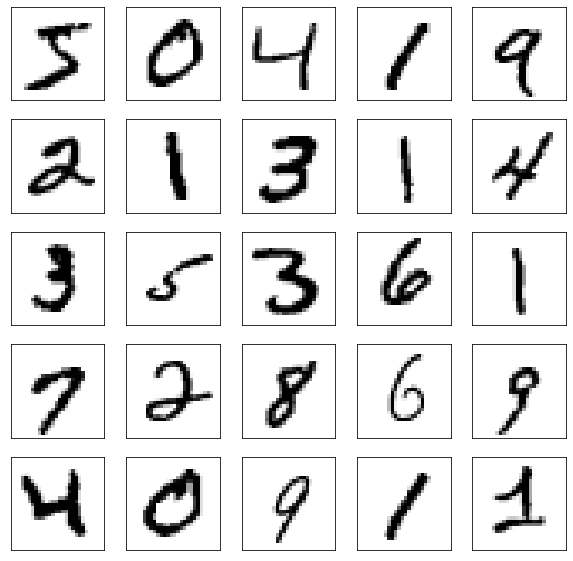

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [48]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [49]:
from keras.models import Sequential
from keras import models, layers
import keras

In [50]:
model = Sequential()
model.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1), padding='same'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))

model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

model.add(layers.Flatten())

model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer = 'Adam', metrics=['accuracy'])

In [51]:
hist = model.fit(x_train, y_train,
                epochs=10,
                batch_size=1228,
                validation_data=(x_test, y_test),
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.4846 - accuracy: 0.8582 - val_loss: 0.2517 - val_accuracy: 0.9292
Epoch 2/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2297 - accuracy: 0.9330 - val_loss: 0.1888 - val_accuracy: 0.9473
Epoch 3/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.1799 - accuracy: 0.9490 - val_loss: 0.1600 - val_accuracy: 0.9549
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.1480 - accuracy: 0.9580 - val_loss: 0.1352 - val_accuracy: 0.9608
Epoch 5/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1250 - accuracy: 0.9649 - val_loss: 0.1129 - val_accuracy: 0.9676
Epoch 6/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1055 - accuracy: 0.9711 - val_loss: 0.0996 - val_accuracy: 0.9705
Epoch 7/10
60000/60000 [==============================] - 158s

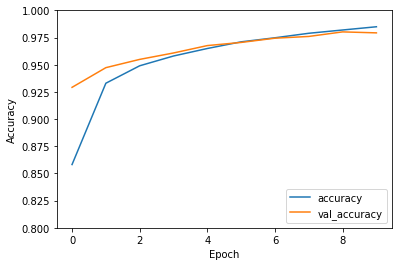

In [52]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)